In [4]:
import warnings
warnings.filterwarnings(action='ignore')

import sys
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, read_csv
from scipy.stats import pearsonr

In [2]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [10]:
origin = read_csv('C:/Users/Jihwan/01Class/E.추론통계/E.InferentialStatistics/수업자료/r_dataisbeautiful_posts.csv',encoding='utf-8')
origin.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,ll1p9h,Wordcloud of trending video titles on YouTube ...,1,OmarZiada,OC: 1,NaN,0.0,[],1613473961,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,ll1o4h,Wordcloud of trending videos on YouTube in the...,1,OmarZiada,OC: 1,moderator,0.0,[],1613473829,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
2,ll15gx,Immunization in India. Source: https://niti.go...,1,Professional_Napper_,NaN,moderator,0.0,[],1613471541,https://www.reddit.com/r/dataisbeautiful/comme...,1,False
3,ll0iup,How to quickly estimate the impact of players ...,1,Viziball,NaN,automod_filtered,0.0,[],1613468624,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,ll0g9a,How to quickly estimate the impact of players ...,1,Viziball,NaN,moderator,0.0,[],1613468281,https://www.reddit.com/r/dataisbeautiful/comme...,2,False


In [11]:
df = origin[['score','total_awards_received', 'created_utc', 'num_comments','over_18']]
df

,score,total_awards_received,created_utc,num_comments,over_18
0,1,0.0,1613473961,0,False
1,1,0.0,1613473829,1,False
2,1,0.0,1613471541,1,False
3,1,0.0,1613468624,0,False
4,1,0.0,1613468281,2,False
...,...,...,...,...,...
190848,15,NaN,1329282849,0,False
190849,9,NaN,1329282160,0,False
190850,13,NaN,1329279777,2,False
190851,21,NaN,1329265203,0,False


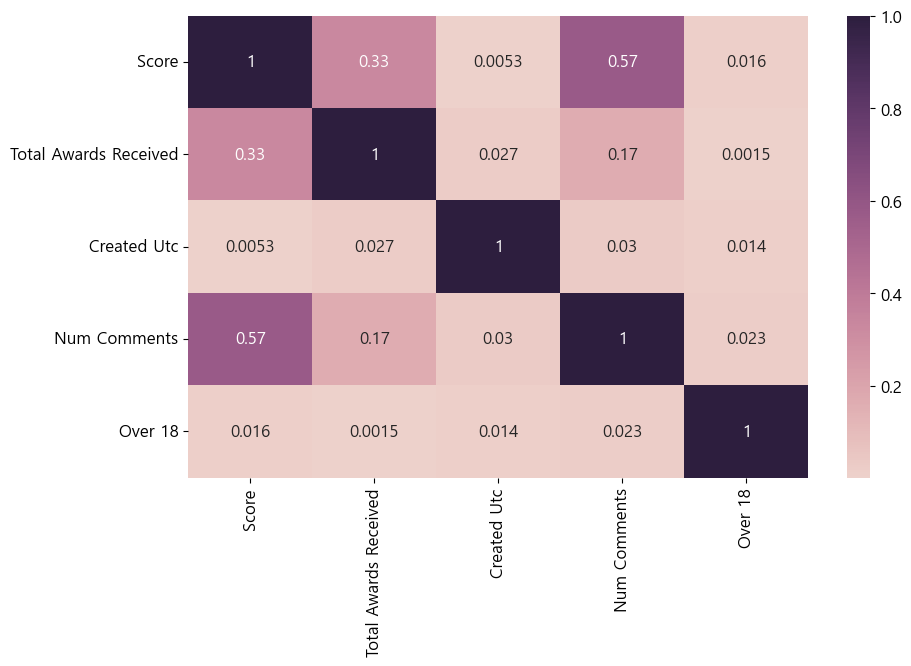

In [12]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sb.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sb.cubehelix_palette(as_cmap=True), ax=ax)